In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

## Заполнение пропусков в данных

Генерация данных

In [2]:
train = [[1, 0, 0],
         [np.nan, 3, 1],
         [1, 3, 1],
         [700, 6, 0]]

Создание *инпутера* и его "настройка".

В данном случае мы подаем imp данные, которые на которых он будет считать статистику для каждой переменной.  
В данном примере в качестве статистики используется среднее значение.

In [3]:
?SimpleImputer

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train)

SimpleImputer()

In [5]:
print(imp.transform(train))

[[  1.   0.   0.]
 [234.   3.   1.]
 [  1.   3.   1.]
 [700.   6.   0.]]


In [6]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(train)

SimpleImputer(strategy='median')

In [7]:
print(imp.transform(train))

[[  1.   0.   0.]
 [  1.   3.   1.]
 [  1.   3.   1.]
 [700.   6.   0.]]


Заполняем данные для X.

Метод transform заполняет пропуски и возврашает заполненный лист.
Данные, которые содержатся в X не используются для получение новых значений, в этом смысле они игнорируются.

In [8]:
X = [[np.nan, 2, 1],
     [100, np.nan, 1],
     [1, 6, np.nan]]

print(imp.transform(X))

[[  1.    2.    1. ]
 [100.    3.    1. ]
 [  1.    6.    0.5]]


In [9]:
print(imp.fit_transform(X))

[[ 50.5   2.    1. ]
 [100.    4.    1. ]
 [  1.    6.    1. ]]


В качестве пропусков могут быть другие значения, например, 9999 или -1.

In [10]:
train = [[1, 0, 0],
         [-1, 3, 1],
         [-1, 3, 1],
         [7, 6, 0]]

imp = SimpleImputer(missing_values=-1, strategy='median')

imp.fit(train)

SimpleImputer(missing_values=-1, strategy='median')

In [11]:
X = [[9999, 2, 1],
     [100, 9999, 1],
     [1, 6, 9999]]
print(imp.transform(X))

[[9.999e+03 2.000e+00 1.000e+00]
 [1.000e+02 9.999e+03 1.000e+00]
 [1.000e+00 6.000e+00 9.999e+03]]


Работа с категориями

In [12]:
train = pd.DataFrame([["ds1", "1", "1"],
                     ["-1", "-1", "2"],
                     ["ds2", "-1", "3"],
                     ["ds2", "2", "-1"]], dtype="category")

In [13]:
imp = SimpleImputer(missing_values="-1", strategy='most_frequent')
imp.fit(train)

X = pd.DataFrame([["3", "-1", "4"],
                 ["-1", "3", "4"]], dtype="category")
print(imp.transform(X))

[['3' '1' '4']
 ['ds2' '3' '4']]


## Обработка временных рядов

In [14]:
import matplotlib.pyplot as plt

Шум от 0 до 1

In [15]:
np.random.rand(100)

array([0.13519568, 0.50358566, 0.91800618, 0.17209853, 0.78375905,
       0.74049422, 0.04990583, 0.69899441, 0.47067983, 0.67734525,
       0.89015599, 0.91156393, 0.41306545, 0.23902233, 0.35887371,
       0.91672481, 0.25173581, 0.23023437, 0.96266227, 0.6823814 ,
       0.03965407, 0.76276895, 0.64915851, 0.96152147, 0.882387  ,
       0.08703757, 0.81225116, 0.81772383, 0.46935298, 0.31853487,
       0.19274275, 0.17203852, 0.59219777, 0.40466786, 0.75647028,
       0.83127809, 0.73183386, 0.63328922, 0.06903355, 0.30944907,
       0.8419868 , 0.86866763, 0.15302145, 0.36491853, 0.95532557,
       0.81668862, 0.21665666, 0.51491031, 0.21921147, 0.29449645,
       0.17057181, 0.27801432, 0.82590336, 0.11908123, 0.22666891,
       0.00609303, 0.75666713, 0.14270611, 0.43261432, 0.02725709,
       0.97939126, 0.70012327, 0.43410137, 0.46704733, 0.57300442,
       0.85227275, 0.66032555, 0.3986196 , 0.12169334, 0.93896084,
       0.30364389, 0.82196416, 0.54480546, 0.20893748, 0.44100

Генерация временного ряда с сезонностью

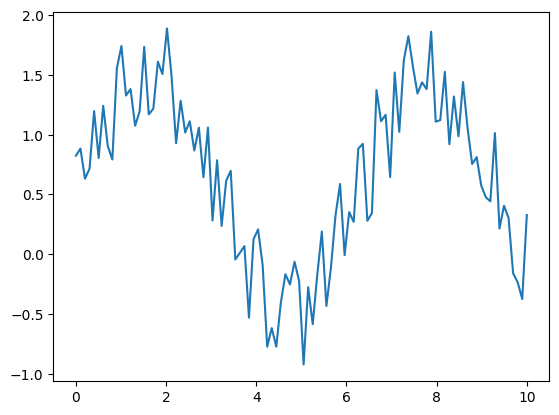

In [30]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.rand(100)
plt.plot(x, y)

Создание пропусков

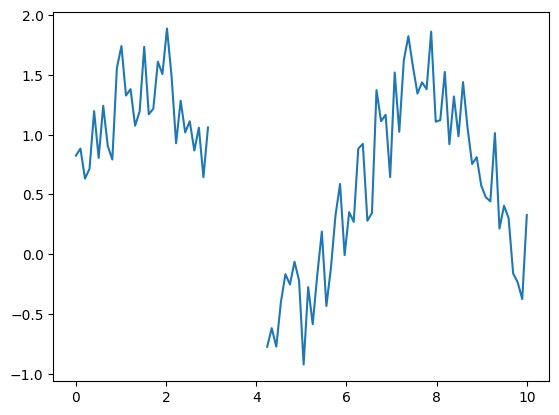

In [31]:
y[30:42] = np.nan

df = pd.DataFrame({"x": x,
                  "y": y})
plt.plot(df["x"], df["y"])

Использование наивного прогноза на основе значения до пропусков

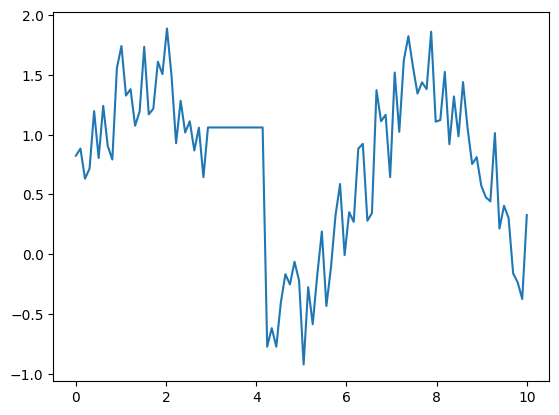

In [32]:
df = pd.DataFrame({"x": x,
                  "y": y})

df = df.interpolate(method ='pad', limit_direction ='forward')
plt.plot(df["x"], df["y"])

Заполнение по ближайшему значению

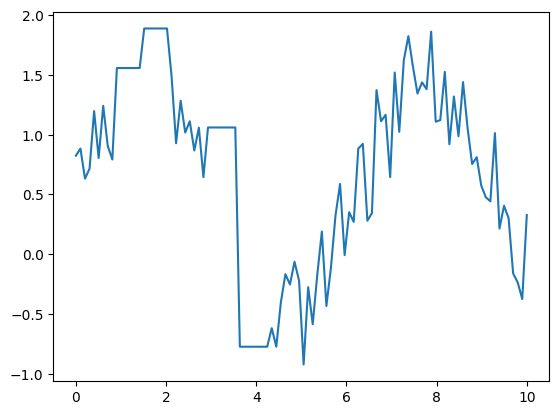

In [33]:
y[10:20] = np.nan
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='nearest', limit_direction ='forward')
plt.plot(df["x"], df["y"])

Линейная интерполяция

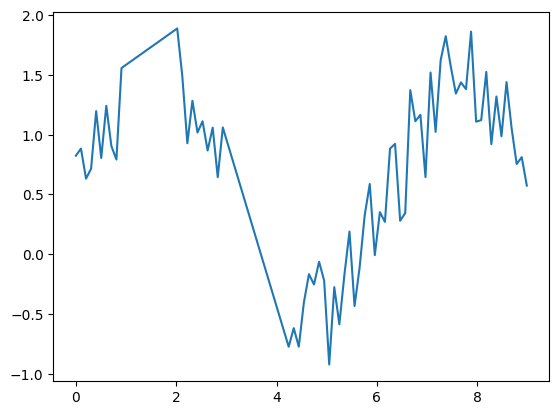

In [34]:
y[-10:] = np.nan
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='linear', limit_direction='backward')
plt.plot(df["x"], df["y"])

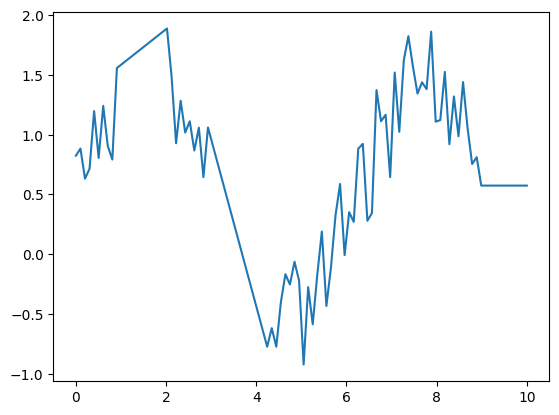

In [35]:
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='linear', limit_direction='forward')
plt.plot(df["x"], df["y"])

Квадратичная интерполяция

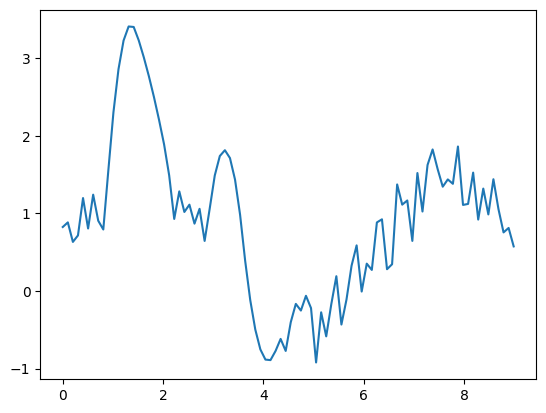

In [36]:
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='quadratic', limit_direction ='forward')
plt.plot(df["x"], df["y"])

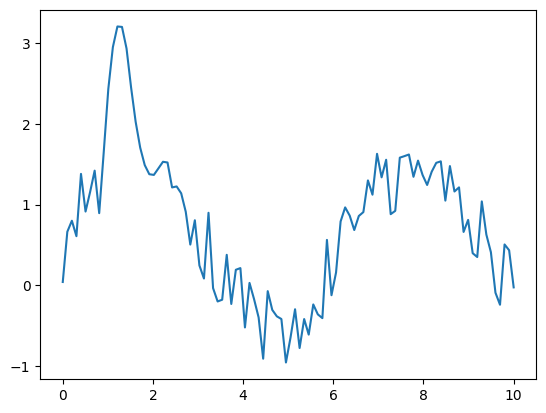

In [37]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.rand(100)

y[10:20] = np.nan
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='quadratic', limit_direction ='forward')
plt.plot(df["x"], df["y"])

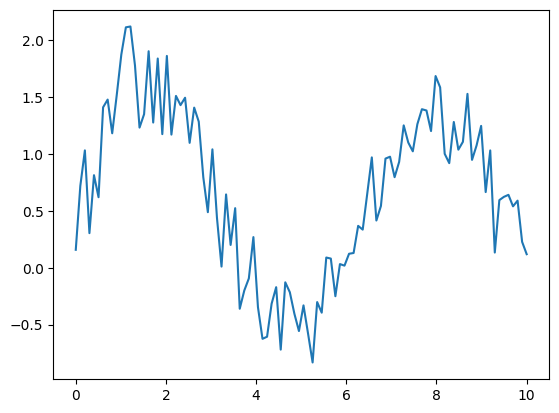

In [38]:
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.rand(100)

y[10:13] = np.nan
df = pd.DataFrame({"x": x,
                  "y": y})
df = df.interpolate(method ='quadratic', limit_direction ='forward')
plt.plot(df["x"], df["y"])